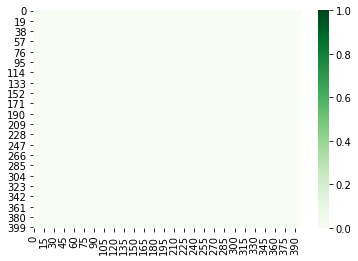

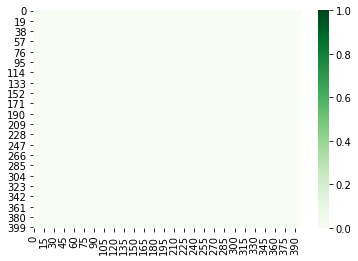

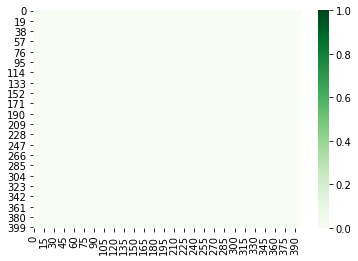

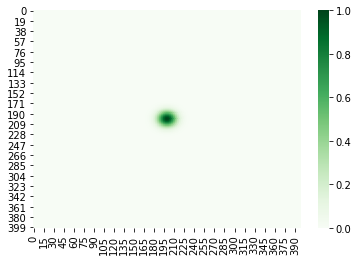

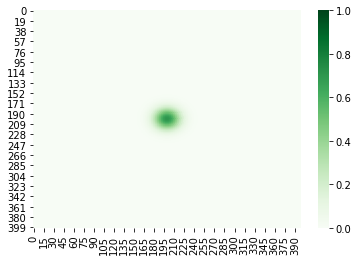

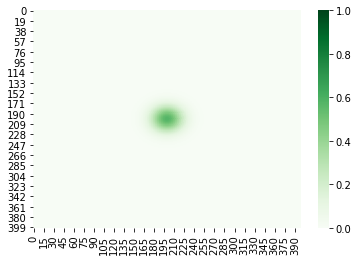

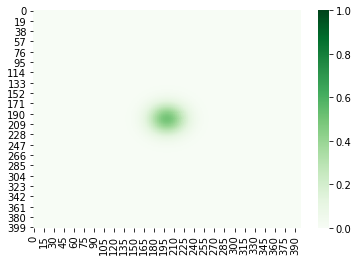

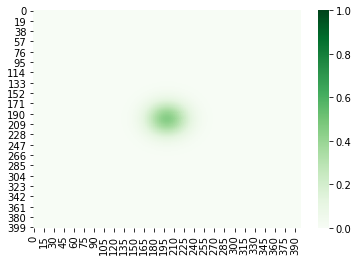

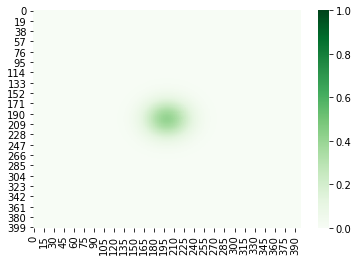

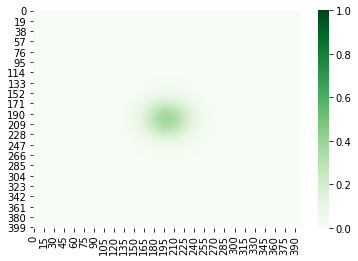

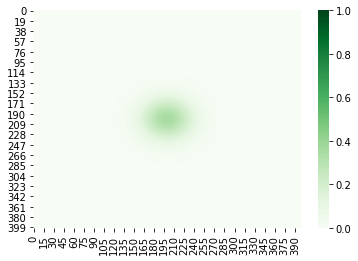

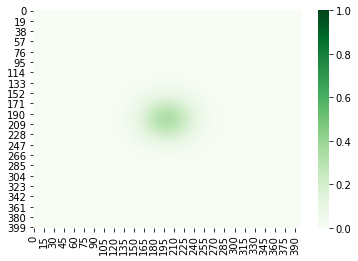

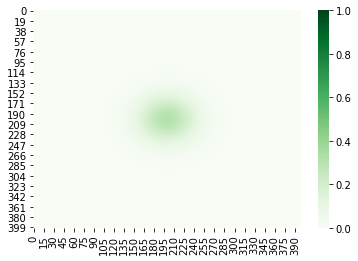

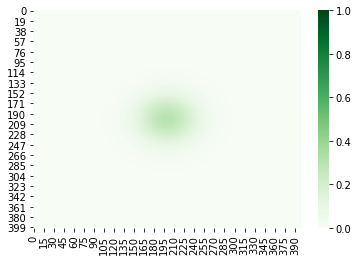

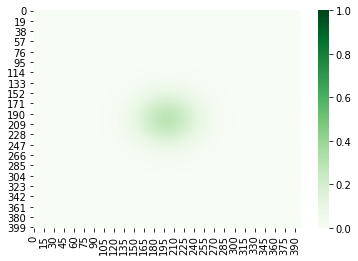

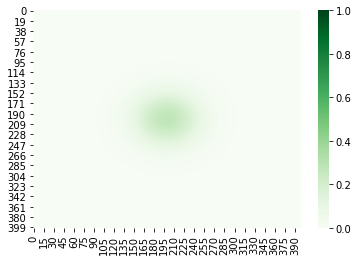

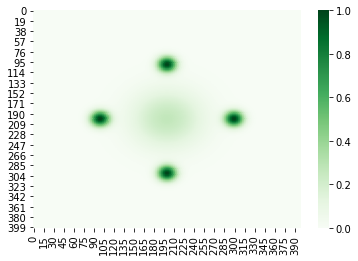

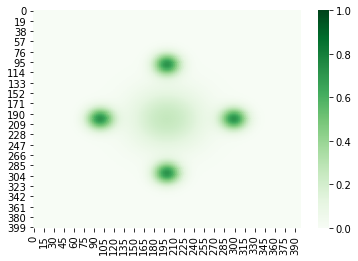

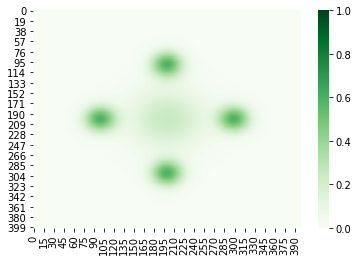

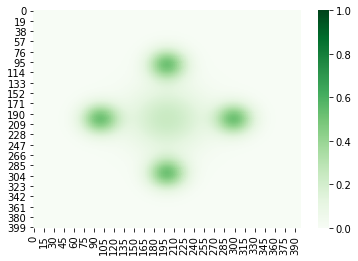

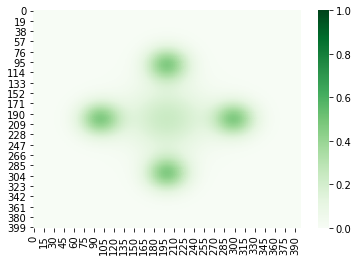

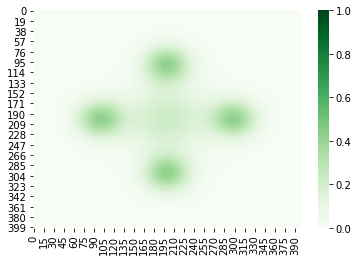

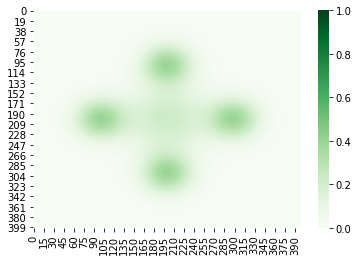

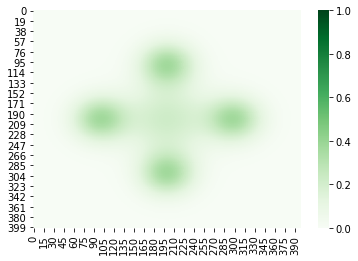

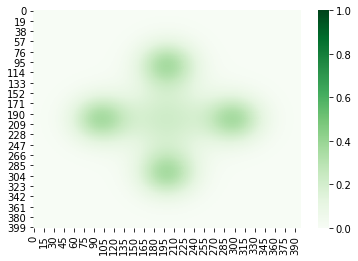

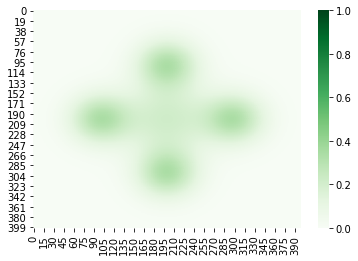

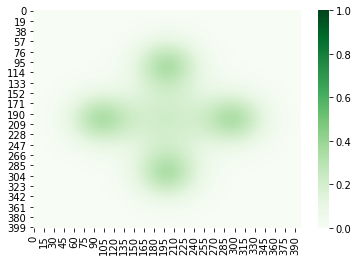

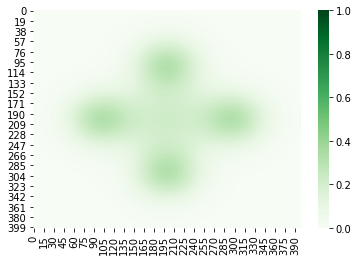

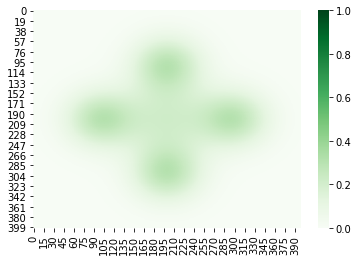

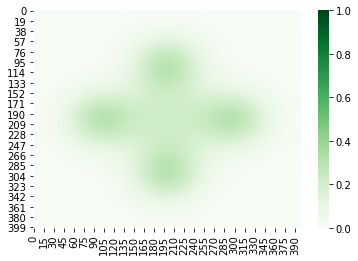

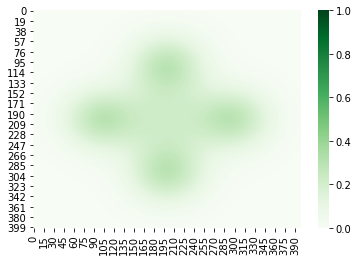

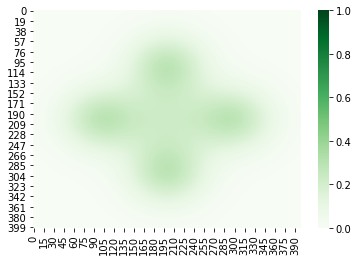

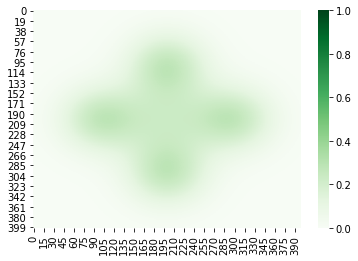

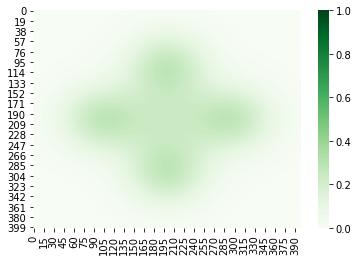

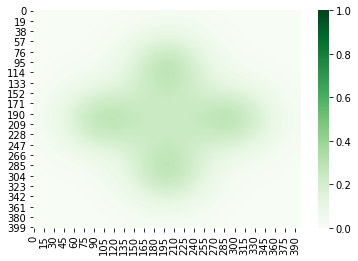

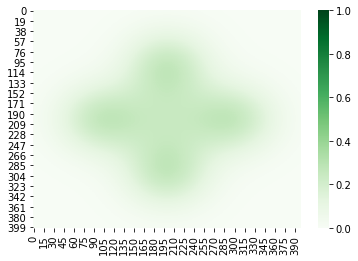

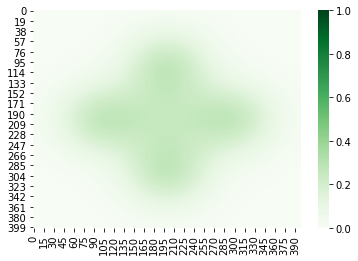

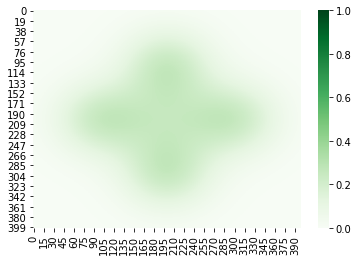

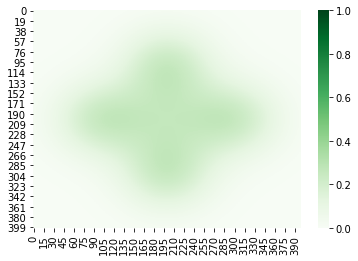

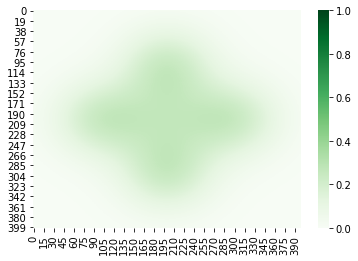

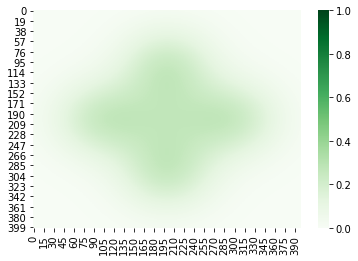

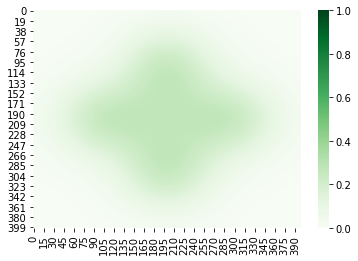

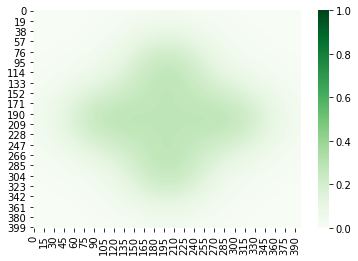

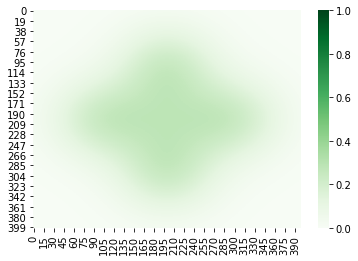

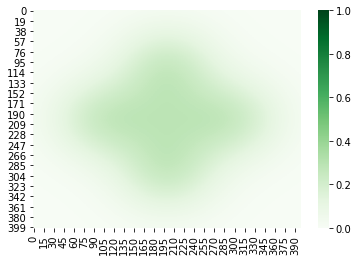

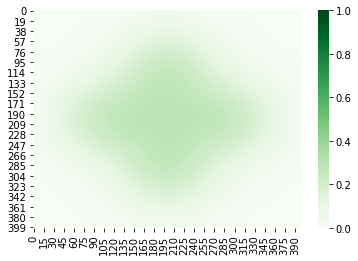

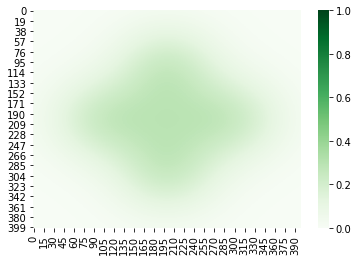

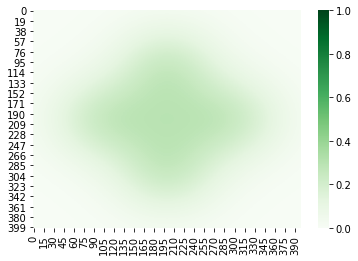

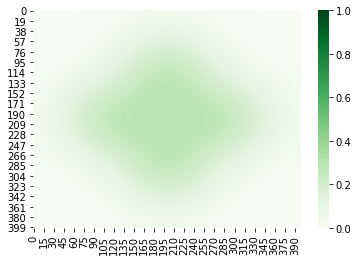

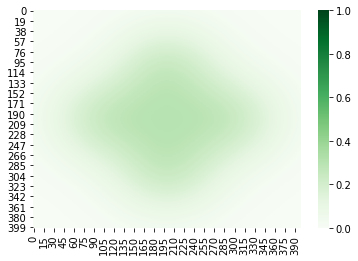

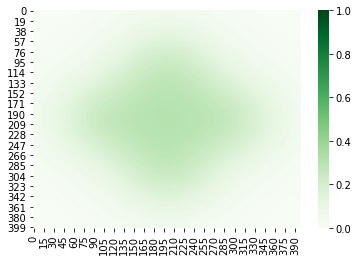

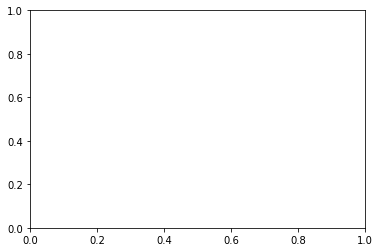

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as manimation

def diffusion_eq(A, B, D, x, x_0, y, y_0, w_x, w_y, t):
    term_1 = A / np.sqrt(t)
    term_2 = (x - x_0 - w_x * t)**2 + (y - y_0 - w_y * t)**2
    c = term_1 * np.exp(-(term_2 / float(4 * D * t))) + B
    return c

def source_propagation(A,B,D,t_array,source_min_x,source_max_x,source_delta_x,min_x,max_x,delta_x,turn_on_threshold,SAVE_MOVIE, w_x=0, w_y=0):

    source_x_array = [-1, 0, 0, 0, 1]
    source_y_array = [0, -1, 0, 1, 0]

    number_of_sources = len(source_x_array)
    source_activity = list(np.zeros(number_of_sources))
    source_activity[int(number_of_sources/2)] = t_array[2]

    X1 = np.arange(-2, 2, 0.01)
    X2 = np.arange(-2, 2, 0.01)
    [x_grid, y_grid] = np.meshgrid(X1, X2)

    for t_i, t in enumerate(t_array, 1):

        concentration = np.zeros([len(x_grid), len(x_grid)])
        for source_i, source in enumerate(source_activity):
            if source > 0:
                current_t = t - source

                # keeps giving the dividing by neg curr_t warning
                if current_t > 0 :
                    current_c = diffusion_eq(A,B,D,x_grid,source_x_array[source_i], y_grid,source_y_array[source_i], w_x,w_y, current_t)
                    concentration += current_c

        try:
            sns.heatmap(concentration, cmap="Greens", cbar=True, vmin=0, vmax=1)
#             plt.contourf(x_grid, y_grid, concentration)
            plt.pause(0.0005)
            plt.cla()
        except:
            pass

        # Turn on inactive bees if above threshold
        for source_i, source in enumerate(source_activity):
            if source == 0:
                x_position = source_x_array[source_i]
                y_position = source_y_array[source_i]

                x_i = int(np.where(np.abs(X1 - x_position) < 1e-6)[0])
                y_i = int(np.where(np.abs(X1 - y_position) < 1e-6)[0])
                if concentration[y_i, x_i] >= turn_on_threshold:
                    source_activity[source_i] = t;


def main():
    A_array = [0.1] # initial chemical concentration per active agent
    turn_on_threshold_array = [0.005] # local concentration threshold above which agents become active and start spreading chemical signal
    D = 0.5 # diffusion coefficient
    delta_t = 0.01 # time intgration constant
    delta_x = 0.01 # size of a cell in the simulation

    B = 0 # ignore for now
    source_delta_x = 1 # distance between agents that produce a chemical signal

    source_min_x = -1
    source_max_x = 1
    min_x = -2
    max_x = 2

    t_array = np.arange(0, 0.51, 0.01)
    SAVE_MOVIE = True

    for curr_A in A_array:
        for turn_on_threshold_i in turn_on_threshold_array:
            data = {
                "A" : curr_A,
                "B" : B,
                "D" : D,
                "t_array" : t_array,
                "source_min_x" : source_min_x,
                "source_max_x" : source_max_x,
                "source_delta_x" : source_delta_x,
                "min_x" : min_x,
                "max_x" : max_x,
                "delta_x" : delta_x,
                "turn_on_threshold" : turn_on_threshold_i,
                "SAVE_MOVIE" : SAVE_MOVIE
            }
            source_propagation(**data)
            plt.show()


if __name__ == '__main__':

    main()

In [ ]:
([0, -0.010000000000063736, -1.1500000000000394],
 [0, -0.8300000000000463, -2.6500000000000075])